#### Muhammad Sholahuddin Rasyid
#### A11.2022.14247
#### DM-4504

# Pre-processing data
## Estimation of Obesity Levels Based On Eating Habits and Physical Condition 

Data diambil dari UC Irvine Repository yang dimana data ini digunakan untuk mengestimasi tingkat obesitas pada individu dari negara Meksiko, Peru dan Kolombia, berdasarkan kebiasaan makan dan kondisi fisik mereka.

link: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

Dataset memiliki 17 attribute dan 2111 record data, dengan 16 kolom sebagai features, dan 1 kolom sebagai Label/Taregt. 
Atribut-atribut yang terkait dengan kebiasaan makan kebiasaan makan adalah: 
- Frekuensi konsumsi makanan berkalori tinggi (FAVC),
- Frekuensi konsumsi sayuran(FCVC),
- Jumlah makanan utama (NCP),
- Konsumsi makanan di antara waktu makan (CAEC),
- Konsumsi air setiap hari (CH20), 
- Konsumsi alkohol (CALC).

Atribut-atribut yang terkait dengan kondisi fisik
kondisi fisik adalah: 
- Pemantauan konsumsi kalori (SCC),
- Frekuensi aktivitas fisik (FAF),
- Waktu penggunaan menggunakan perangkat teknologi (TUE),
- Transportasi yang digunakan (MTRANS)
- Merokook atau tidak (SMOKE)

variabel lain yang diperoleh adalah: 
- Jenis Kelamin,
- Usia,
- Tinggi 
- Berat Badan.
- Riwayat obesitas keluarga (family_history_with_overweight)

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

## Data Sebelum di Proses

In [115]:
data = pd.read_csv('obesitas.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [116]:
data.columns = data.columns.str.strip()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [117]:
# cek null value untuk setiap kolom
print(data.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


## Alur Preprocessing Data

#### Terdapat 3 tipikal fitur pada dataset yaitu:
- Kolom (fitur) dengan value numerik
- Kolom (fitur) dengan value kategorikal, yang memiliki beberapa jenis value
- Kolom (fitur) dengan value kategorikal, yang hanya memiliki 2 jenis value 'ya' atau 'tidak' || 'Male' or 'Female'

Dataset akan di count values, untuk melihat apakah ada value yang tidak normal. atau untuk mengecek ada berapa jenis value pada kolom tersebut. yang nantinya akan langsung dinormalisasi atau dilakukan encoding untuk value yang bersifat kategorikal, supaya dapat memudahkan model untuk memproses dataset dan meningkatkan kinerja model.

### Normalisasi Angka Umur
Didapati value pada kolom angka, dengan nilai yang tidak sesuai dengan ketentuan umur yakni bilangan bulat, maka akan dinormalisasi. 

In [120]:
#normalisasi data angka
value_counts = data['Age'].astype(str).value_counts(dropna=False)

print(value_counts)

Age
18.0         128
26.0         101
21.0          96
23.0          89
19.0          59
            ... 
23.32012       1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64


In [121]:
# Konversi ke numerik, coerce untuk mengubah nilai non-numerik jadi NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Konversi ke integer
data['Age'] = data['Age'].astype(int)

# Print value counts setelah normalisasi
value_counts = data['Age'].astype(str).value_counts(dropna=False)
print(value_counts)


Age
21    271
18    238
19    186
23    163
22    161
25    159
26    139
20    137
24     84
17     82
30     65
31     46
29     43
33     36
37     33
38     31
27     31
16     29
34     28
40     22
28     22
39     20
32     18
36     12
35     12
41     11
43      7
42      5
55      5
45      4
47      2
56      1
51      1
44      1
14      1
15      1
50      1
52      1
46      1
61      1
Name: count, dtype: int64


### Mengubah value kategorikal dari Gender, menjadi bilangan 0 untuk Perempuan dan 1 untuk Laki-laki

untuk mengoptimalkan performa model dalam memahami dan memproses data, alangkah baiknya data yang bersifat kategorikal diubah menjadi numerik. Langkahnya dapat berbeda tergantung dengan jenis valuenya.

In [123]:
value_counts = data['Gender'].astype(str).value_counts(dropna=False)

print(value_counts)

Gender
Male      1068
Female    1043
Name: count, dtype: int64


In [124]:
#BINER
# Normalisasi kolom 'Gender' 

data['Gender'] = data['Gender'].map({'Female': 0.0, 'Male': 1.0})

print(data['Gender'].astype(str).value_counts(dropna=False))

Gender
1.0    1068
0.0    1043
Name: count, dtype: int64


### Normalisasi angka Height

Didapati value pada kolom height, memiliki value yang kurang normal dengan asumsi tinggi badan hanya mencakup 2 angka dibelakang koma saja contoh mungkin 1,75 m. jumlah angka dibelakang koma terlalu banyak, sehingga akan dibulatkan menjadi 2 angka dibelakang koma.

In [126]:
value_counts = data['Height'].astype(str).value_counts(dropna=False)

print(value_counts)

Height
1.7         60
1.65        50
1.6         43
1.75        39
1.62        36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: count, Length: 1574, dtype: int64


In [127]:
# Bulatkan ke 2 desimal
data['Height'] = data['Height'].round(2)

# Print value counts setelah normalisasi 
print(data['Height'].astype(str).value_counts(dropna=False))

Height
1.7     125
1.75    122
1.62     96
1.76     96
1.65     88
1.6      77
1.72     76
1.63     75
1.77     71
1.71     68
1.74     66
1.67     66
1.64     66
1.79     65
1.78     64
1.61     62
1.68     61
1.8      59
1.66     58
1.69     54
1.82     50
1.73     43
1.84     40
1.56     39
1.81     39
1.85     39
1.83     35
1.55     32
1.57     30
1.59     29
1.58     27
1.53     27
1.87     22
1.86     21
1.54     20
1.52     19
1.5      17
1.91     12
1.51     11
1.88     10
1.9       7
1.89      7
1.93      4
1.92      4
1.49      3
1.48      3
1.98      2
1.46      1
1.45      1
1.95      1
1.94      1
Name: count, dtype: int64


### Normalisasi angka Weight

didapati value pada weight(berat badan), sama seperti height memiliki banyak angka dibelakang koma. dengan acuan timbangan digital, value weight akan dibulatkan menjadi 2 angka saja dibelakang koma

In [129]:
value_counts = data['Weight'].astype(str).value_counts(dropna=False)
print(value_counts)

Weight
80.0          59
70.0          43
50.0          42
75.0          40
60.0          37
              ..
65.140408      1
87.27989       1
67.083121      1
90.13868       1
133.472641     1
Name: count, Length: 1525, dtype: int64


In [130]:
data['Weight'] = pd.to_numeric(data['Weight'], errors='coerce')

# Bulatkan ke 2 desimal
data['Weight'] = data['Weight'].round(2)

# Print value counts setelah normalisasi 
print(data['Weight'].astype(str).value_counts(dropna=False))

Weight
80.0      59
70.0      43
50.0      42
75.0      40
60.0      37
          ..
83.31      1
83.39      1
99.81      1
80.01      1
133.35     1
Name: count, Length: 1335, dtype: int64


### Encoding Biner kolom family_history_with_overweight
karena didapati value yang memiliki 2 jawaban ya dan tidak maka akan dilakukan encoding ke biner supaya menjadi value numerik

In [132]:
#mengubah nama kolom ke fam_history supaya tidak terlalu panjang
data = data.rename(columns={'family_history_with_overweight': 'fam_history'})

value_counts = data['fam_history'].astype(str).value_counts(dropna=False)
print(value_counts)

fam_history
yes    1726
no      385
Name: count, dtype: int64


In [133]:
#BINER
# Normalisasi kolom 'Fam_history'
data['fam_history'] = data['fam_history'].map({'no': 0.0, 'yes': 1.0})

print(data['fam_history'].astype(str).value_counts(dropna=False))

fam_history
1.0    1726
0.0     385
Name: count, dtype: int64


### Encoding Biner FAVC

FAVC atau Frequent consumption of high caloric food. adalah sebuah pertanyaan apakah anda sering mengkonsumsi makanan tinggi kalori. dengan value ya dan tidak maka akan dilakukan encoding ke biner.

In [135]:
#Do you eat high caloric food frequently?

value_counts = data['FAVC'].astype(str).value_counts(dropna=False)
print(value_counts)

FAVC
yes    1866
no      245
Name: count, dtype: int64


In [136]:
#BINER
# Normalisasi kolom 'FAVC'
data['FAVC'] = data['FAVC'].map({'no': 0.0, 'yes': 1.0})

print(data['FAVC'].astype(str).value_counts(dropna=False))

FAVC
1.0    1866
0.0     245
Name: count, dtype: int64


### Normalisasi kolom FCVC
FCVC atau Frequency of consumption of vegetables adalah seberapa sering seseorang mengkonsumsi sayuran. dengan value dalam bentuk frekuensi 1-3
namun pada dataset terdapat angka outlier yang tidak bulat sehingga akan dilakukan rounding pembulatan hingga mendapatkan angka bulat yakni 1-3

In [138]:
value_counts = data['FCVC'].astype(str).value_counts(dropna=False)
print(value_counts)

# Nilai maksimum kolom 'FCVC' untuk mengetahui batas atas dan bawah value
ncp_max = data['FCVC'].max()
ncp_min = data['FCVC'].min()

print(f"Nilai maksimum NCP: {ncp_max}")
print(f"Nilai minimum NCP: {ncp_min}")

FCVC
3.0         652
2.0         600
1.0          33
2.823179      2
2.21498       2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: count, Length: 810, dtype: int64
Nilai maksimum NCP: 3.0
Nilai minimum NCP: 1.0


In [139]:
# Normalisasi ke bilangan bulat terdekat (1, 2, 3)
data['FCVC'] = data['FCVC'].round().astype(float)

# Batasi nilai FCVC hanya 1-3
data['FCVC'] = np.clip(data['FCVC'], 1, 3)

print(data['FCVC'].value_counts(dropna=False))

FCVC
2.0    1013
3.0     996
1.0     102
Name: count, dtype: int64


### Normalisasi kolom NCP
NCP atau  Number of main meals berapa kali anda makan dalam sehari. memiliki tipikal value yang sama dengan FCVC yakni angka bulat. dan akan dilakukan rounding untuk angka outlier yang tidak bulat

In [141]:
value_counts = data['NCP'].astype(str).value_counts(dropna=False)
print(value_counts)

# Nilai maksimum kolom 'NCP' untuk mengetahui batas atas dan bawah value
ncp_max = data['NCP'].max()
ncp_min = data['NCP'].min()


print(f"Nilai maksimum NCP: {ncp_max}")
print(f"Nilai minimum NCP: {ncp_min}")

NCP
3.0         1203
1.0          199
4.0           69
2.77684        2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: count, Length: 635, dtype: int64
Nilai maksimum NCP: 4.0
Nilai minimum NCP: 1.0


In [142]:
#How many main meals do you have daily?

# Normalisasi ke bilangan bulat terdekat (1, 2, 3, atau 4)
data['NCP'] = data['NCP'].round().astype(float)

# Batasi nilai NCP hanya 1, 2, 3, atau 4
data['NCP'] = np.clip(data['NCP'], 1, 4)

print(data['NCP'].value_counts(dropna=False))

NCP
3.0    1470
1.0     316
2.0     176
4.0     149
Name: count, dtype: int64


### Encoding kolom CAEC
CAEC atau  Consumption of food between meals adalah sebuah pertanyaan apakah anda mengkonsumsi sesuatu disela-sela waktu sebelum jam makan. dengan value kategorikal yakni Sometimes, Frequently, Always, dan No .maka akan diencode menjadi numerik menggunakan .map()

In [144]:
#Do you eat any food between meals?

value_counts = data['CAEC'].astype(str).value_counts(dropna=False)
print(value_counts)

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64


In [145]:
#Encoding
data['CAEC'] = data['CAEC'].map({'no': 0.0, 'Sometimes': 1.0, 'Frequently': 2.0, 'Always': 3.0})

print(data['CAEC'].value_counts(dropna=False))

CAEC
1.0    1765
2.0     242
3.0      53
0.0      51
Name: count, dtype: int64


### Encoding Biner kolom SMOKE

In [147]:
value_counts = data['SMOKE'].astype(str).value_counts(dropna=False)
print(value_counts)

SMOKE
no     2067
yes      44
Name: count, dtype: int64


In [148]:
#BINER
# Normalisasi kolom 'SMOKE'
data['SMOKE'] = data['SMOKE'].map({'no': 0.0, 'yes': 1.0})

print(data['SMOKE'].astype(str).value_counts(dropna=False))

SMOKE
0.0    2067
1.0      44
Name: count, dtype: int64


### Rounding kolom CH20
CH20 atau Consumption of 
water dail, sebarapa banyak  minum aior dalam sehari. dengan tipikal value yang sama dengan FCVC yakni frekuensi 1-3. akan dilakukan rounding value yang outliery

In [150]:
#How much water do you drink daily? 

value_counts = data['CH2O'].astype(str).value_counts(dropna=False)
print(value_counts)

# Nilai maksimum kolom 'CH20'
ncp_max = data['CH2O'].max()
ncp_min = data['CH2O'].min()

print(f"Nilai maksimum NCP: {ncp_max}")
print(f"Nilai minimum NCP: {ncp_min}")

CH2O
2.0         448
1.0         211
3.0         162
2.825629      3
1.636326      3
           ... 
1.622638      1
2.452986      1
2.035954      1
1.944095      1
2.863513      1
Name: count, Length: 1268, dtype: int64
Nilai maksimum NCP: 3.0
Nilai minimum NCP: 1.0


In [151]:
data['CH2O'] = pd.to_numeric(data['CH2O'], errors='coerce')
# Bulatkan ke 2 desimal
data['CH2O'] = data['CH2O'].round(2)

# Print value counts setelah normalisasi 
print(data['CH2O'].astype(str).value_counts(dropna=False))

CH2O
2.0     467
1.0     221
3.0     163
2.17     16
2.04     15
       ... 
2.34      2
1.45      2
1.9       2
1.58      1
1.26      1
Name: count, Length: 201, dtype: int64


### Encoding Biner kolom SCC Calories consumption monitoring

In [153]:
#BINER
#SCC
value_counts = data['SCC'].astype(str).value_counts(dropna=False)
print(value_counts)

# Normalisasi kolom 'SCC'
data['SCC'] = data['SCC'].map({'no': 0.0, 'yes': 1.0})

print(data['SCC'].astype(str).value_counts(dropna=False))

SCC
no     2015
yes      96
Name: count, dtype: int64
SCC
0.0    2015
1.0      96
Name: count, dtype: int64


### Rounding kolom FAF
FAF atau Physical activity frequency, seberapa banyak melakukan aktivitas fisik. value bersifat frekuensi, dan akan dilkukan rounding untuk outlier

In [155]:
#FAF 
#kategorikal 
value_counts = data['FAF'].astype(str).value_counts(dropna=False)
print(value_counts)

# Nilai maksimum kolom 'NCP'
ncp_max = data['FAF'].max()
ncp_min = data['FAF'].min()

print(f"Nilai maksimum NCP: {ncp_max}")
print(f"Nilai minimum NCP: {ncp_min}")

FAF
0.0         411
1.0         234
2.0         183
3.0          75
0.110174      2
           ... 
1.916751      1
0.954459      1
0.340915      1
0.986414      1
1.026452      1
Name: count, Length: 1190, dtype: int64
Nilai maksimum NCP: 3.0
Nilai minimum NCP: 0.0


In [156]:
# Normalisasi ke bilangan bulat terdekat (1, 2, 3, atau 4)
data['FAF'] = data['FAF'].round().astype(float)

# Batasi nilai NCP hanya 1, 2, 3, atau 4
data['FAF'] = np.clip(data['FAF'], 1, 4)


print(data['FAF'].value_counts(dropna=False))

#kategorikal tapi sudah angka bentuknya frekuensi nilai dari 1-3

FAF
1.0    1496
2.0     496
3.0     119
Name: count, dtype: int64


### Rounding Kolom TUE
TUE atau Time using 
technology device, atau screentime seseorang. sama dengan FAF value nya merupakan frekuensi.s

In [158]:
#TUE
# How much time do you use technological devices such as cell phone, videogames, television, computer and others? (SCREEN TIME)
value_counts = data['TUE'].astype(str).value_counts(dropna=False)
print(value_counts)

# Nilai maksimum kolom 'TUE'
ncp_max = data['TUE'].max()
ncp_min = data['TUE'].min()

print(f"Nilai maksimum NCP: {ncp_max}")
print(f"Nilai minimum NCP: {ncp_min}")

TUE
0.0         557
1.0         292
2.0         109
0.630866      4
1.119877      3
           ... 
1.343044      1
1.019452      1
0.673408      1
0.9976        1
0.714137      1
Name: count, Length: 1129, dtype: int64
Nilai maksimum NCP: 2.0
Nilai minimum NCP: 0.0


In [159]:
# Normalisasi ke bilangan bulat terdekat (1, 2, 3, atau 4)
data['TUE'] = data['TUE'].round().astype(float)

# Batasi nilai TUE hanya 1, 2, 3, atau 4
data['TUE'] = np.clip(data['TUE'], 0, 2)

print(data['TUE'].value_counts(dropna=False))

#kategorikal tapi sudah angka bentuknya frekuensi nilai dari 0-2

TUE
0.0    952
1.0    915
2.0    244
Name: count, dtype: int64


### Encode Kategorikal kolom CALC

CALC atau  Consumption of alcohol. dengan value yang sama dengan kolom CAEC, akan dilakukan encoding value dengan melabeli dengan angka

In [161]:
# CALC
value_counts = data['CALC'].astype(str).value_counts(dropna=False)
print(value_counts)

# encoding
data['CALC'] = data['CALC'].map({'no': 0.0, 'Sometimes': 1.0, 'Frequently': 2.0, 'Always': 3.0})

# Print value counts setelah normalisasi (untuk memeriksa)
print(data['CALC'].value_counts(dropna=False))

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
CALC
1.0    1401
0.0     639
2.0      70
3.0       1
Name: count, dtype: int64


### Label Encoding Kategorikal kolom MTRANS

MTRANS atau transportasi yang digunakan bersifat kategorikal. dan akan diencoding dalam label 0-4

In [163]:
# MTRANS
value_counts = data['MTRANS'].astype(str).value_counts(dropna=False)
print(value_counts)


# Encoding kolom 'MTRANS'
mtrans_mapping = {
    'Public_Transportation': 0,
    'Automobile': 1,
    'Walking': 2,
    'Motorbike': 3,
    'Bike': 4
}

data['MTRANS'] = data['MTRANS'].map(mtrans_mapping)

print(data['MTRANS'].value_counts(dropna=False))

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
MTRANS
0    1580
1     457
2      56
3      11
4       7
Name: count, dtype: int64


## Data Yang sudah di process sekaligus normalisasi

In [165]:
print(data)

      Gender  Age  Height  Weight  fam_history  FAVC  FCVC  NCP  CAEC  SMOKE  \
0        0.0   21    1.62   64.00          1.0   0.0   2.0  3.0   1.0    0.0   
1        0.0   21    1.52   56.00          1.0   0.0   3.0  3.0   1.0    1.0   
2        1.0   23    1.80   77.00          1.0   0.0   2.0  3.0   1.0    0.0   
3        1.0   27    1.80   87.00          0.0   0.0   3.0  3.0   1.0    0.0   
4        1.0   22    1.78   89.80          0.0   0.0   2.0  1.0   1.0    0.0   
...      ...  ...     ...     ...          ...   ...   ...  ...   ...    ...   
2106     0.0   20    1.71  131.41          1.0   1.0   3.0  3.0   1.0    0.0   
2107     0.0   21    1.75  133.74          1.0   1.0   3.0  3.0   1.0    0.0   
2108     0.0   22    1.75  133.69          1.0   1.0   3.0  3.0   1.0    0.0   
2109     0.0   24    1.74  133.35          1.0   1.0   3.0  3.0   1.0    0.0   
2110     0.0   23    1.74  133.47          1.0   1.0   3.0  3.0   1.0    0.0   

      CH2O  SCC  FAF  TUE  CALC  MTRANS

### Simpan data yang telah di pre processing

In [167]:
# data.to_csv("obesitas_preprocessed.csv", index=False)

# Distribusi Data dengan Label

In [169]:
data = pd.read_csv('obesitas_preprocessed.csv')

### Distribusi data kolom(fitur) numerik terhadap target kelas obesitas

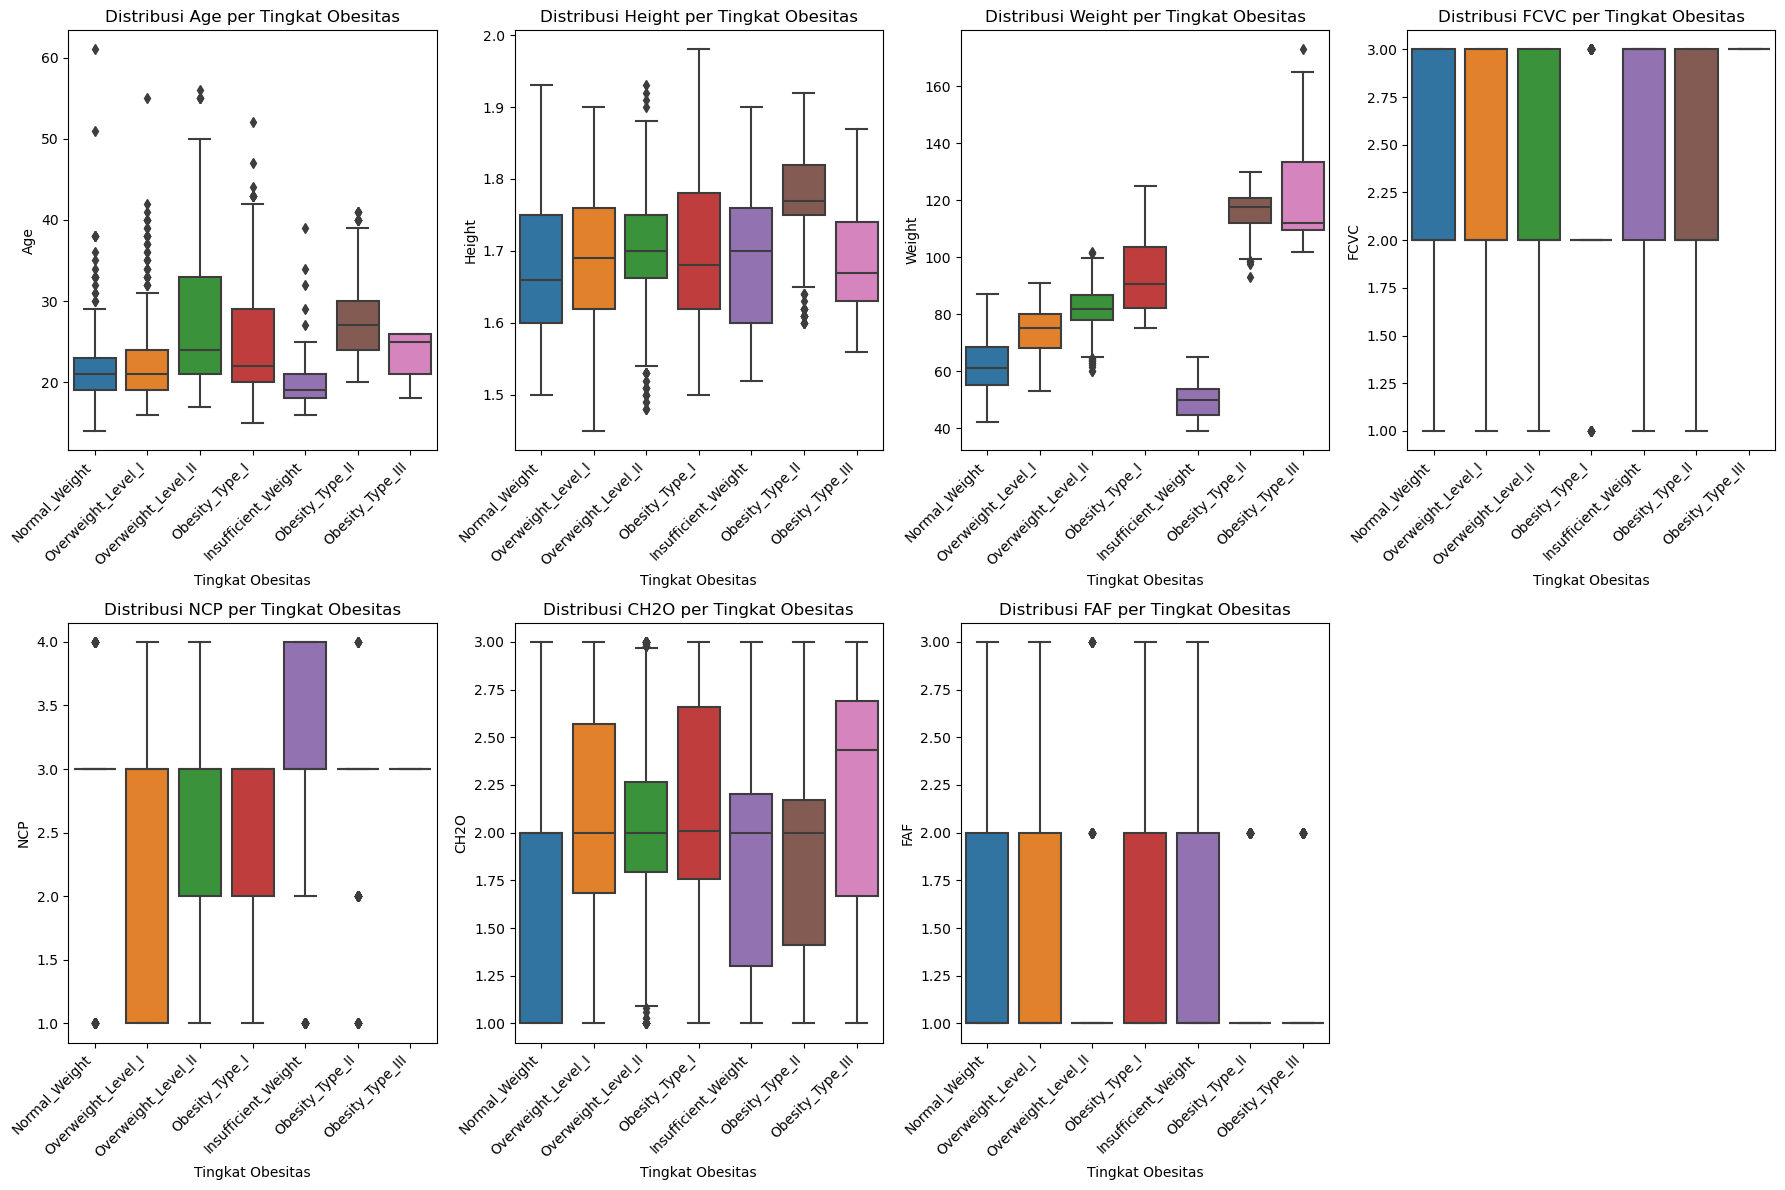

In [171]:
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF'] # Tambahkan kolom numerik lain yang relevan

plt.figure(figsize=(18, 12))  # Sesuaikan ukuran figure
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x='NObeyesdad', y=col, data=data)
    plt.xlabel('Tingkat Obesitas')
    plt.ylabel(col)
    plt.title(f'Distribusi {col} per Tingkat Obesitas')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Distribusi umur, tinggi, dan berat dalam kolom numerik menunjukkan variasi yang signifikan di antara berbagai tingkat obesitas, seperti yang terlihat dari boxplot. Secara umum, individu dengan obesitas cenderung memiliki berat yang lebih tinggi dan tinggi yang bervariasi, sementara individu dengan berat normal menunjukkan rentang yang lebih sempit.

Distribusi nilai untuk kolom FCVC, NCP, CH2O, dan FAF menunjukkan perbedaan yang jelas antara kategori obesitas. Misalnya, nilai NCP dan FAF cenderung lebih tinggi pada individu dengan obesitas dibandingkan dengan mereka yang memiliki berat normal. Hal ini menunjukkan bahwa pola makan dan aktivitas fisik mungkin berkontribusi pada tingkat obesitas.

### Distribusi data kolom(fitur) kategorikal(Biner) terhadap target kelas obesitas

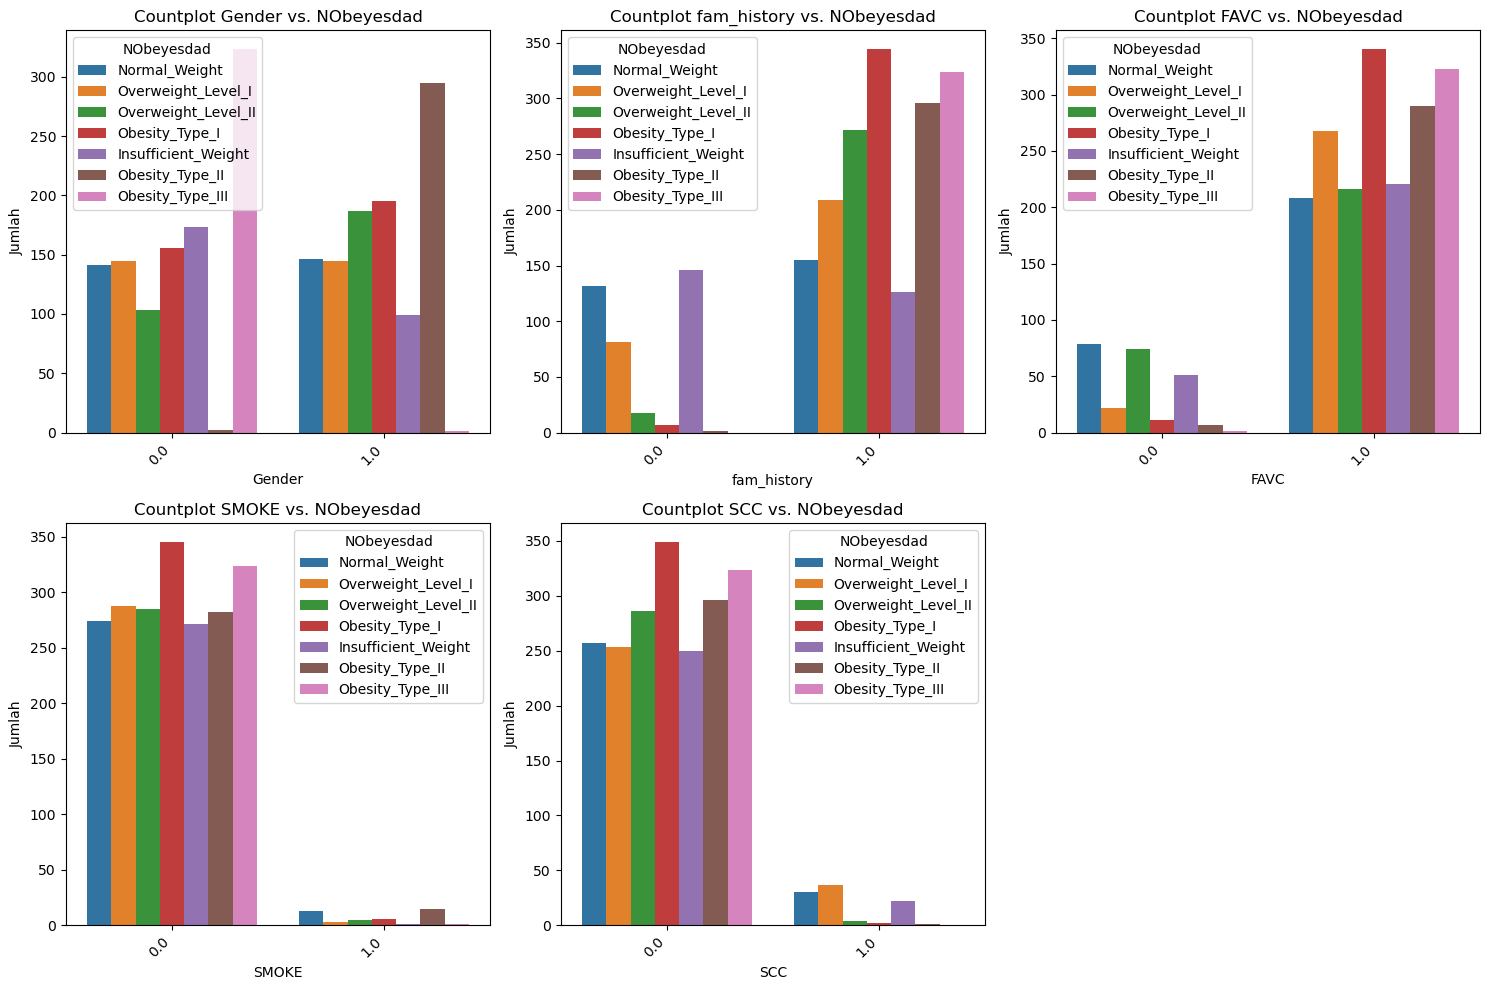

In [174]:
# Kolom biner
binary_cols = ['Gender', 'fam_history', 'FAVC', 'SMOKE', 'SCC']

# 1. Countplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(binary_cols):
    plt.subplot(2, 3, i+1)  # 2 baris, 3 kolom
    sns.countplot(x=col, hue='NObeyesdad', data=data)
    plt.title(f'Countplot {col} vs. NObeyesdad')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')  # Rotasi label jika diperlukan

plt.tight_layout()
plt.show()


- Kolom kategorikal biner seperti Gender, Riwayat Keluarga, FAVC, Merokok, dan SCC menunjukkan perbedaan signifikan dalam distribusi terhadap tingkat obesitas. Countplot mengindikasikan bahwa terdapat variasi yang mencolok antara pria dan wanita dalam kategori obesitas.

- Riwayat keluarga dan kebiasaan merokok menunjukkan pola yang menarik. Individu yang memiliki riwayat keluarga obesitas cenderung lebih banyak berada dalam kategori obesitas. Hal ini menunjukkan bahwa faktor genetik dan perilaku memiliki peran penting dalam perkembangan obesitas.

### Distribusi data kolom(fitur) kategorikal(non-biner) terhadap target kelas obesitas

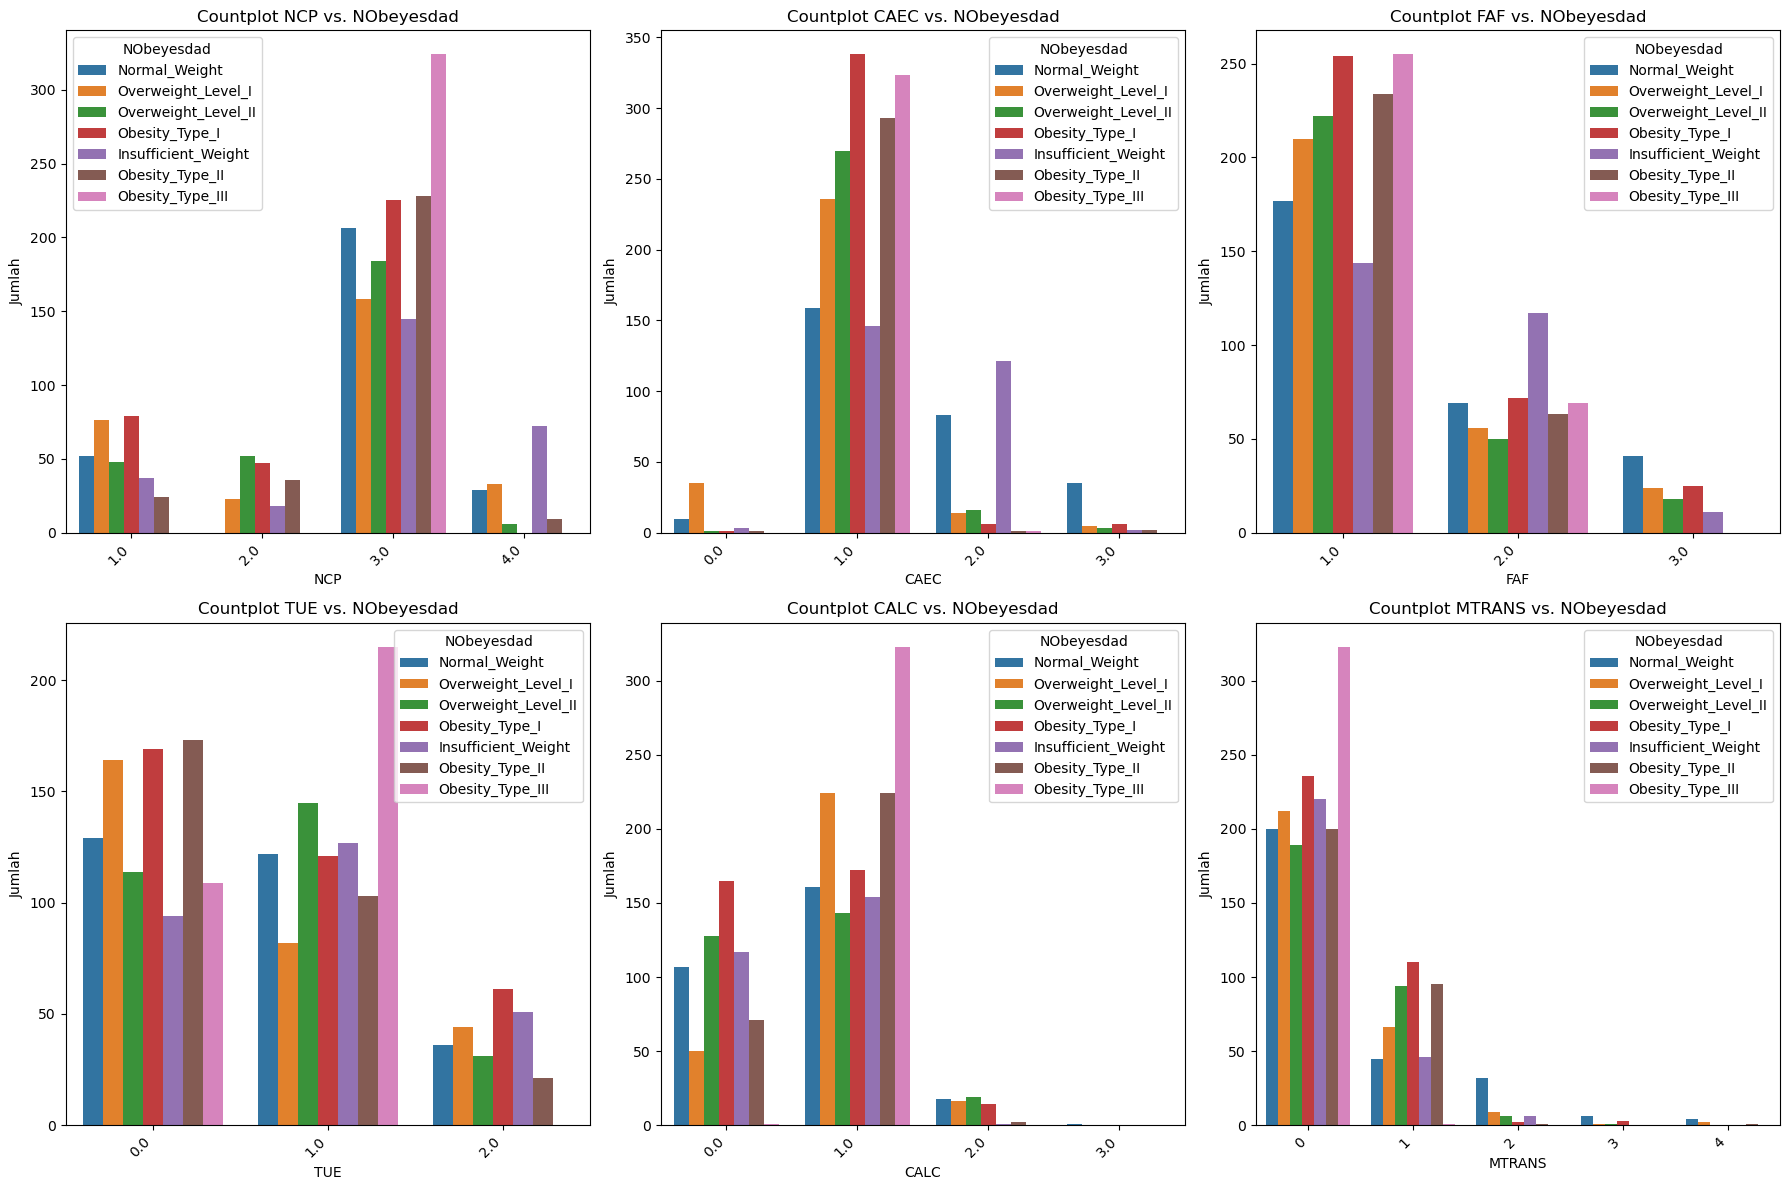

In [177]:
categorical_cols = ['NCP', 'CAEC', 'FAF', 'TUE', 'CALC', 'MTRANS'] # List kolom kategorikal non-biner

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)  # 2 baris, 3 kolom
    sns.countplot(x=col, hue='NObeyesdad', data=data)
    plt.title(f'Countplot {col} vs. NObeyesdad')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Countplot untuk kolom kategorikal non-biner seperti NCP, CAEC, FAF, TUE, CALC, dan MTRANS menunjukkan variasi yang signifikan dalam distribusi nilai. Misalnya, nilai NCP yang lebih tinggi sering kali terkait dengan kategori obesitas, yang mengindikasikan bahwa kebiasaan makan (CAEC) dan aktivitas fisik (FAF, MTRANS) berperan penting dalam menentukan tingkat obesitas.

### Nantinya akan dilakukan klasifikasi menggunakan algoritma Decision Tree dengan kriteria entropy untuk memaksimalkan hasil kinerja model

Dengan model data yang memiliki label yang jelas seperti ini, akan sangat cocok bila menggunakan algoritma supervised learning. pada awalnya akan menggunakan algoritma KNN (K-Nearest-Neigbour). Namun mengingat dimensi data yang begitu besar, memiliki banyak fitur dan record, dan memiliki lebih dari 2 jenis label/target. Sedangkan KNN sangat sensitif dan performanya berkurang, ketika dimensi data begitu besar dan akan berpengaruh terhadap performa model. maka dipilihlah, Decision Tree.